In [1]:
import pandas as pd
import os, json

In [2]:
BASE_DIR = '/workspace/BoneMeta_raw'
JSON_DIR = os.path.join(BASE_DIR, 'json')

SMALL_Z_CRITERIA = 1.5 #mm

In [3]:
CASE_NAMES = os.listdir(JSON_DIR)

In [4]:
len(CASE_NAMES)

310

In [5]:
def get_json_file(case_name):
    json_path = os.path.join(JSON_DIR, case_name, 'lesionAnnot3D.json')
    return json.load(open(json_path))

In [6]:
j = get_json_file(CASE_NAMES[0])
j['volumeInfo']['voxelResolution_mm']

'0.560547 x 0.560547 x 1.000000'

In [12]:
def get_voxel_size(json):
    size_string = json['volumeInfo']['voxelResolution_mm']
    size_list = size_string.split(' x ')
    return tuple([float(size) for size in size_list])

In [13]:
get_voxel_size(j)

(0.560547, 0.560547, 1.0)

In [23]:
voxel_size_df = pd.DataFrame([get_voxel_size(get_json_file(case)) for case in CASE_NAMES], columns=['x', 'y', 'z'])
voxel_size_df.head()

,x,y,z
0,0.560547,0.560547,1.0
1,0.621094,0.621094,1.0
2,0.589844,0.589844,1.0
3,0.613281,0.613281,1.0
4,0.646484,0.646484,1.0


In [24]:
(voxel_size_df.x == voxel_size_df.y).all()

True


Min_x : 0.251953
Max_x : 1.367188


<AxesSubplot:>

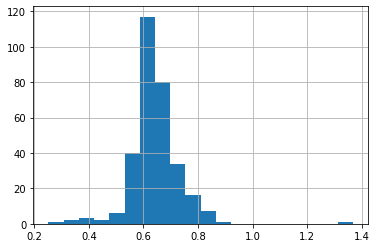

In [25]:
print(f"""
Min_x : {voxel_size_df.x.min()}
Max_x : {voxel_size_df.x.max()}""")
voxel_size_df.x.hist(bins = 20)

In [31]:
pd.Index(voxel_size_df.x).get_loc(0.251953)

13

In [32]:
pd.Index(voxel_size_df.x).get_loc(1.367188)

35

In [35]:
voxel_size_df.iloc[35]

x    1.367188
y    1.367188
z    3.000000
Name: 35, dtype: float64

<AxesSubplot:>

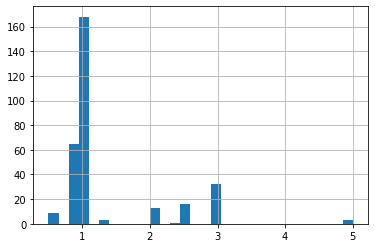

In [37]:
# Z size hist
voxel_size_df.z.hist(bins = 30)

<AxesSubplot:>

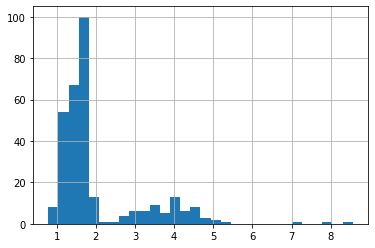

In [46]:
x_z_ratio = (voxel_size_df.z / voxel_size_df.x)
x_z_ratio.hist(bins = 30)

In [44]:
pd.Series(CASE_NAMES)[x_z_ratio>2.2].values

array(['BH041_20190201_C-T-L Spine (3D)', 'SN034_20200101_chest',
       '000269_20190325_abdomen', 'SN049_20170901_abdomen',
       '000269_20181214_abdomen', 'SN042_20170901_abdomen',
       '000270_20190601_abdomen', '000012_20181212_abdomen',
       'SN015_20190901_abdomen', 'SN050_20170401_chest',
       'SN014_20190901_abdomen', 'SN039_20181001_abdomen',
       '000269_20181016_abdomen', 'SN059_20170501_chest',
       'SN031_20160501_abdomen', 'BH030_20160101_T-L spine (3D)',
       'SN011_20180401_chest', 'SN039_20181001_chest',
       'SN049_20170901_chest', 'SN055_20170301_abdomen',
       'SN007_20190801_abdomen', 'SN045_20170201_abdomen',
       'SN011_20180401_abdomen', '000262_20190319_abdomen',
       'SN048_20170801_chest', 'SN013_20190401_abdomen',
       'SN004_20190801_abdomen', '000286_20190710_chest',
       'SN012_20150801_abdomen', 'SN020_20190801_abdomen',
       'SN028_20160801_abdomen', 'SN019_20190801_abdomen',
       'SN040_20170201_CT Neck (contrast)', '0002

In [45]:
pd.Series(CASE_NAMES)[voxel_size_df.z>2].values

array(['SN034_20200101_chest', '000269_20190325_abdomen',
       'SN049_20170901_abdomen', '000269_20181214_abdomen',
       '000270_20190601_abdomen', '000012_20181212_abdomen',
       'SN032_20190401_T spine CT pre contr', 'SN015_20190901_abdomen',
       'SN050_20170401_chest', 'SN014_20190901_abdomen',
       '000269_20181016_abdomen', 'SN059_20170501_chest',
       'SN031_20160501_abdomen', 'SN011_20180401_chest',
       'SN039_20181001_chest', 'SN049_20170901_chest',
       'SN055_20170301_abdomen', 'SN007_20190801_abdomen',
       'SN011_20180401_abdomen', '000262_20190319_abdomen',
       'SN048_20170801_chest', 'SN013_20190401_abdomen',
       'SN004_20190801_abdomen', '000286_20190710_chest',
       'SN020_20190801_abdomen', 'SN040_20170201_CT Neck (contrast)',
       '000251_20190429_abdomen', 'SN020_20190801_chest',
       'SN040_20170201_abdomen', 'SN030_20191101_abdomen',
       '000304_20190124_CT Liver (contrast)', 'SN035_20180101_chest',
       '000025_20180808_abdomen

In [38]:
def z_of_case(case):
    j = get_json_file(case)
    return get_voxel_size(j)[2]

def is_small_z_case(case):
    z_size = z_of_case(case)
    return z_size < SMALL_Z_CRITERIA

In [52]:
small_z_idx = pd.Series([is_small_z_case(case) for case in CASE_NAMES])
small_z_cases = pd.Series(CASE_NAMES)[small_z_idx].values
z_of_small_z_cases = [z_of_case(case) for case in small_z_cases]
print(f'''
Total cases: {len(CASE_NAMES)}
Small z cases: {small_z_idx.sum()}
Max z in small_z cases: {max(z_of_small_z_cases)}
Min z in small_z cases: {min(z_of_small_z_cases)}
'''
)


Total cases: 310
Small z cases: 245
Max z in small_z cases: 1.25
Min z in small_z cases: 0.5



In [69]:
f"{list(small_z_cases)}"

"['000251_20190703_chest', '000356_20191024_chest', '000350_20190927_chest', '000397_20200214_chest', 'BH005_20170701_abdomen', 'BH041_20190201_C-T-L Spine (3D)', 'BH005_20170701_chest', '000355_20190901_abdomen', '000022_20180830_chest', '000244_20190501_abdomen', '000332_20191025_chest', '000019_20181018_chest', 'BH011_20190301_Spine^00_C_Spine_Pre_OP (Adult)', '000019_20190613_chest', 'BH017_20191201_abdomen', '000273_20190531_chest', '000404_20200305_chest', '000286_20190701_abdomen', 'SN015_20190901_chest', '000391_20200216_Thoracic Aorta CT Angio+3D (contrast)', '000262_20190501_abdomen', 'SN013_20190401_chest', '000285_20190807_chest', '000362_20191201_abdomen', '000322_20190913_chest', 'BH057_20191227_chest', '000400_20200210_chest', 'BH064_20200605_abdomen', 'BH034_20190901_chest', '000298_20190726_chest', '000311_20190902_chest', '000396_20200201_abdomen', '000223_20190319_chest', 'BH032_20180701_abdomen', '000291_20190701_abdomen', 'BH045_20181001_abdomen', '000296_20190726_